# Practical Application III: Comparing Classifiers

**Overview**: In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

### Getting Started

The dataset you will use comes from the UCI Machine Learning repository (Links to an external site.). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article (Links to an external site.) accompanying the dataset (in the .zip file) for more information on the data and features. The objective of this project is to find a model that can explain success of marketing programs run by a bank in driving customer subscriptions to deposit accounts. Such a model can
be valuable in increasing campaign efficiency by identifying the key success drivers of a cmpaign, and can lead to a more efficient allocation of marketing resources while delivering a higher ROI on the deployed resources. This exericse will be executed as follows:
· Model the marketing dataset on four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
· Determine the right evaluation metrics for this exercise along with a clear rationale for the choice of the metrics
· Interpret the selected evaluation metrics for each model and compare the models.
· Choose an appropriate model that best meets the business objective.

### Step 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

How many marketing campaigns does this data represent:
17 campaigns that occurred between May 2008 and November 2010.

### Step 2: Read the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
from time import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.utils.fixes import loguniform

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

set_config(display="diagram")

In [2]:
from sklearn.exceptions import UndefinedMetricWarning

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df['duration'].sample(5) # look at random sample of duration

34486    200
1051     266
21415    162
17466     48
3654     265
Name: duration, dtype: int64

### Step 3: Understand the features available in the dataset


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# Bank Client Data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# Other Attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# Socio economic Context Attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Target variable:
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

### Step 4: Defining the Business Objective

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The objective of this project is to find a model that can explain success of marketing programs run by a bank in driving customer subscriptions to deposit accounts. Such a model can be valuable in increasing campaign efficiency by identifying the key success drivers of a cmpaign, and can lead to a more efficient allocation of marketing resources while delivering a higher ROI on the deployed resources.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Step 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
# Banking Columns 1-7 (or Zero to Six)
Num_Col = ['age'] # Numeric features
Or_Cat_Col =  ['job','education'] # Categorical Features with a hierarchy
Cat_Col = ['marital', 'default', 'housing', 'loan'] # Categorical features without a hierarchy

In [7]:
CT_pipe = ColumnTransformer([
    ("num", StandardScaler(), Num_Col), # just scale the numeric column
    ('cat', OneHotEncoder(), Cat_Col), # OneHotEncode the categorical columns
    ('cator', OrdinalEncoder(), Or_Cat_Col) # OrdinalEncode the categorical columns
])

In [8]:
df['y'] = df['y'].replace(['No', 'Yes',], ['0', '1']) # turn into bool
df['y'] = df['y'].replace(['no', 'yes',], ['0', '1']) # turn into bool
df['y'] = pd.to_numeric(df['y'])

### Step 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
df_clean = df.drop(['contact','month','day_of_week','duration','campaign','pdays','previous','poutcome',
                    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis = 1) # drop other columns for now

In [22]:
X = df_clean.drop('y', axis = 1)
y = df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, shuffle=True)

In [24]:
# Use the pipeline to transform features to having them Scaled/OneHot/Ordinal Encoded
xl_train = CT_pipe.fit_transform(X_train)
xl_test = CT_pipe.transform(X_test)

In [26]:
#oversampling of minority class for addressing class imbalance
from imblearn.over_sampling import SMOTE

#oversampling for balancing
oversample = SMOTE()
X_train_ovs, y_train_ovs = oversample.fit_resample(xl_train, y_train)

### Step 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Establish a baseline performance that our classifier should aim to beat.

In [31]:
y.value_counts() # The distribution of the target variable

0    36548
1     4640
Name: y, dtype: int64

In [32]:
print(36548/len(y)) # find percent of no in dataset

0.8873458288821987


In [33]:
print (1 - .887) # percent of yes 11.3%

0.11299999999999999


In [35]:
def eval_grid_clf(clf, X_train, y_train, X_test, y_test, params, scoring):
    grid_clf = GridSearchCV(clf, param_grid=params, scoring = scoring)
    grid_clf.fit(X_train, y_train)
    print(classification_report(y_test, grid_clf.predict(X_test)))
    return grid_clf, np.mean(grid_clf.cv_results_['mean_fit_time'])

Model accuracy should be above 88.7%; otherwise, simply just guessing the client didn't subscribe to a term deposit, would be a more accurate prediction.

### Step 8: A Simple Model

Use Logistic Regression to build a basic model on your data.

In [36]:
# Build a Logistic Regression Classifier
logreg_params = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['lbfgs', 'liblinear'],
}

In [38]:
logreg_grid, logreg_fit_times = eval_grid_clf(LogisticRegression(max_iter=1000), xl_train, y_train, xl_test, y_test, logreg_params, 'recall')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9122
           1       0.00      0.00      0.00      1175

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.78      0.89      0.83     10297



In [39]:
print(logreg_fit_times)
logreg_grid.best_params_

0.07709121193204607


{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
logreg_grid_ovs, logreg_fit_times_ovs = eval_grid_clf(LogisticRegression(max_iter=1000), X_train_ovs, y_train_ovs, xl_test, y_test, logreg_params, 'recall')

              precision    recall  f1-score   support

           0       0.94      0.27      0.42      9122
           1       0.13      0.87      0.23      1175

    accuracy                           0.34     10297
   macro avg       0.54      0.57      0.33     10297
weighted avg       0.85      0.34      0.40     10297



In [41]:
print(logreg_fit_times_ovs)
logreg_grid_ovs.best_params_

0.13383829082761492


{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

### Step 9: Score the LR Classifier Model

What is the accuracy of your model?

In [ ]:
%%time
#LG

lg_model = LogisticRegression()
lg_model.fit(xl_train, y_train)

In [18]:
lg_predict = lg_model.predict(xl_test)# check performance
lg_predict_ta = lg_model.predict(xl_train)# check performance
print('ROCAUC score:',roc_auc_score(y_test, lg_predict))
print('Train Accuracy score:', accuracy_score(y_train, lg_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, lg_predict))
print('F1 score:',f1_score(y_test, lg_predict))
print(classification_report(y_test, lg_predict, target_names=['No', 'Yes']))

ROCAUC score: 0.5
Train Accuracy score: 0.8878314072059823
Test Accuracy score: 0.8858890939108478
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9122
         Yes       0.00      0.00      0.00      1175

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.78      0.89      0.83     10297



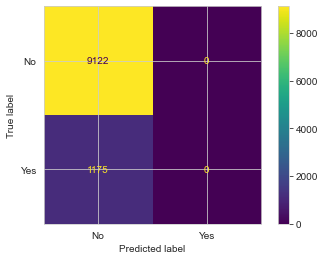

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, lg_predict, display_labels = ['No', 'Yes'])

In [ ]:
# Accuracy is basically the same as always guessing no. So the model is useless.

In [ ]:
# 100% False Negative. This model also can't predict when someone will respond positively. Again, not useful.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [99]:
%%time
#KNN

knn_model = KNeighborsClassifier()
knn_model.fit(xl_train, y_train)

CPU times: total: 15.6 ms
Wall time: 3 ms


KNeighborsClassifier()

In [125]:
knn_predict = knn_model.predict(xl_test)# check performance
knn_predict_ta = knn_model.predict(xl_train)# check performance
print('ROCAUC score:', roc_auc_score(y_test, knn_predict))
print('Train Accuracy score:', accuracy_score(y_train, knn_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, knn_predict))
print('F1 score:', f1_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict, target_names=['No', 'Yes']))

ROCAUC score: 0.5211816650883765
Train Accuracy score: 0.8929461655498365
Test Accuracy score: 0.8774400310770127
F1 score: 0.09985734664764621
              precision    recall  f1-score   support

          No       0.89      0.98      0.93      9122
         Yes       0.31      0.06      0.10      1175

    accuracy                           0.88     10297
   macro avg       0.60      0.52      0.52     10297
weighted avg       0.82      0.88      0.84     10297



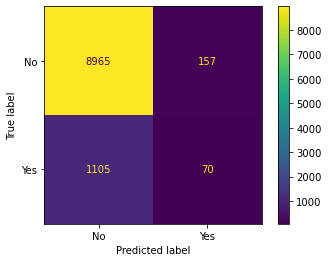

In [177]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predict, display_labels = ['No', 'Yes'])

In [113]:
%%time
svc_model = SVC()
svc_model.fit(xl_train, y_train)

CPU times: total: 23.7 s
Wall time: 23.6 s


SVC()

In [123]:
svc_predict = svc_model.predict(xl_test)# check performance
svc_predict_ta = svc_model.predict(xl_train)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Train Accuracy score:', accuracy_score(y_train, svc_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
print(classification_report(y_test, svc_predict, target_names=['No', 'Yes']))

ROCAUC score: 0.5
Train Accuracy score: 0.8878314072059823
Test Accuracy score: 0.8858890939108478
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9122
         Yes       0.00      0.00      0.00      1175

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.78      0.89      0.83     10297



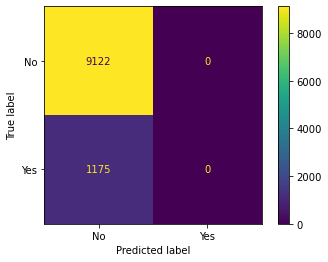

In [188]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_predict, display_labels = ['No', 'Yes'])

In [ ]:
# 100% False Negative. This model also can't predict when someone will respond positively so again it is useless.

In [115]:
%%time
# we can add class_weight='balanced' to add penalize mistake
svc_model2 = SVC(class_weight='balanced', probability=True)
svc_model2.fit(xl_train, y_train)

CPU times: total: 8min 5s
Wall time: 8min 5s


SVC(class_weight='balanced', probability=True)

In [186]:
svc_predict2 = svc_model2.predict(xl_test)# check performance
svc_predict2_ta = svc_model2.predict(xl_train)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict2))
print('Train Accuracy score:', accuracy_score(y_train, svc_predict2_ta))
print('Test Accuracy score:', accuracy_score(y_test, svc_predict2))
print('F1 score:',f1_score(y_test, svc_predict2))
print(classification_report(y_test, svc_predict2, target_names=['No', 'Yes']))

ROCAUC score: 0.5967891513152677
Train Accuracy score: 0.5527823637952802
Test Accuracy score: 0.5516169758181995
F1 score: 0.25012181257105737
              precision    recall  f1-score   support

          No       0.92      0.54      0.68      9122
         Yes       0.15      0.66      0.25      1175

    accuracy                           0.55     10297
   macro avg       0.54      0.60      0.47     10297
weighted avg       0.84      0.55      0.63     10297



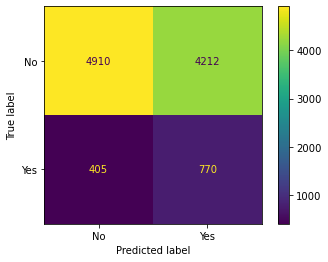

In [187]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_predict2, display_labels = ['No', 'Yes'])

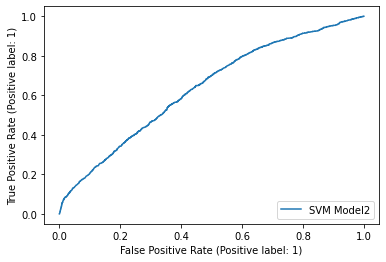

In [203]:
RocCurveDisplay.from_estimator(svc_model2, xl_test, y_test, label = 'SVM Model2')

In [ ]:
# This model (SVM Model2) catches the most true positive data points so far. 
# Unfortunately, it also has a lot of false positives. 
# This is also the least accurate model.

In [106]:
%%time
rfc = RandomForestClassifier()
# fit the predictor and target
rfc.fit(xl_train, y_train)

CPU times: total: 1.48 s
Wall time: 1.49 s


RandomForestClassifier()

In [122]:
# predict
rfc_predict = rfc.predict(xl_test)# check performance
rfc_predict_ta = rfc.predict(xl_train)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Train Accuracy score:', accuracy_score(y_train, rfc_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict, target_names=['No', 'Yes']))

ROCAUC score: 0.5301584665550202
Train Accuracy score: 0.9183904697160985
Test Accuracy score: 0.8677284646013402
F1 score: 0.1379746835443038
              precision    recall  f1-score   support

          No       0.89      0.97      0.93      9122
         Yes       0.27      0.09      0.14      1175

    accuracy                           0.87     10297
   macro avg       0.58      0.53      0.53     10297
weighted avg       0.82      0.87      0.84     10297



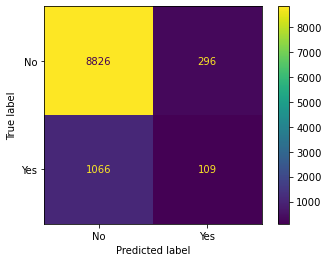

In [185]:
ConfusionMatrixDisplay.from_predictions(y_test, rfc_predict, display_labels = ['No', 'Yes'])

In [110]:
%%time
dtc = DecisionTreeClassifier()
# fit the predictor and target
dtc.fit(xl_train, y_train)

CPU times: total: 62.5 ms
Wall time: 57.5 ms


DecisionTreeClassifier()

In [120]:
# predict
dtc_predict = dtc.predict(xl_test)# check performance
dtc_predict_ta = dtc.predict(xl_train)# check performance
print('ROCAUC score:',roc_auc_score(y_test, dtc_predict))
print('Train Accuracy score:', accuracy_score(y_train, dtc_predict_ta))
print('Test Accuracy score:', accuracy_score(y_test, dtc_predict))
print('F1 score:',f1_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict, target_names=['No', 'Yes']))

ROCAUC score: 0.5326208791465105
Train Accuracy score: 0.9183904697160985
Test Accuracy score: 0.863552491016801
F1 score: 0.1479684657368102
              precision    recall  f1-score   support

          No       0.89      0.96      0.93      9122
         Yes       0.26      0.10      0.15      1175

    accuracy                           0.86     10297
   macro avg       0.58      0.53      0.54     10297
weighted avg       0.82      0.86      0.84     10297



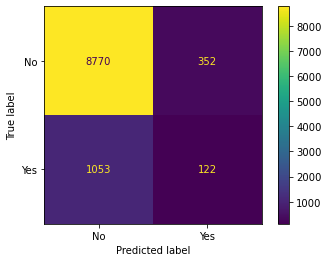

In [184]:
ConfusionMatrixDisplay.from_predictions(y_test, dtc_predict, display_labels = ['No', 'Yes'])

In [215]:
# Put Results in a dataframe: Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models
data = {'Model': ['Logistic Regression', 'KNN', 'SVM', 'SVM2','RandomForest','Decision Tree'],
        'Train Accuracy': [ 0.888, 0.893, 0.888, 0.553, 0.918, 0.918],
        'Test Accuracy': [0.886, 0.877, 0.886, 0.552, 0.868, 0.864],
        'Train Time(ms)': [14100, 3, 23600, 485000, 1480, 57.5]
       }
results_df = pd.DataFrame(data).set_index('Model')

In [216]:
results_df.head(10)

,Train Accuracy,Test Accuracy,Train Time(ms)
Model,,,
Logistic Regression,0.888,0.886,14100.0
KNN,0.893,0.877,3.0
SVM,0.888,0.886,23600.0
SVM2,0.553,0.552,485000.0
RandomForest,0.918,0.868,1480.0
Decision Tree,0.918,0.864,57.5


The least accurate model is also the most useful in predicting if someone will open an account, 
thus accuracy isn't a good metric for this task.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<AxesSubplot:>

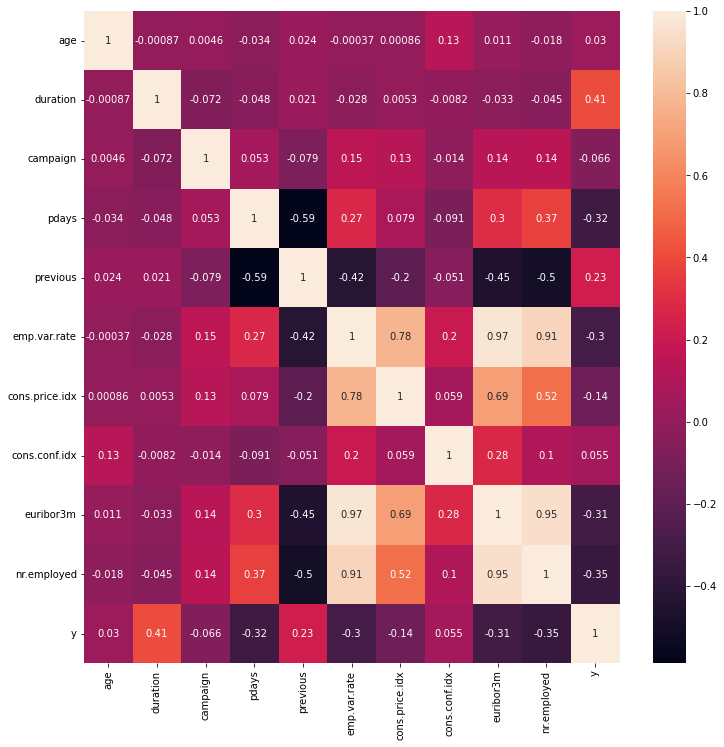

In [97]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True) 

The heatmap above doesn't show anything but weak correlations to the y column. 
The weak correlations it shows are to duration (which we are going to drop) as well as the social and economic context attributes, 
and those attributes seem highly correlated to each other. Thus, they won't provide very much information on their own.

The dataset is imbalanced, - i.e., many more no's than yeses - so accuracy isn't the performance metric to tune too.

Most of the models didn't do very well, so adding more features is warranted to see if we can improve anything.

For example, should we keep the gender feature? Why or why not? - There is no feature gender, so we can not keep it.

SSwitching the primary metric to recall is appropriate - more importantly to recall of Yes - since that is the goal of the model is to predict who will say yes at the end of the call. 
The next set of models will tune the hyperparameters trying to maximize recall.

In [133]:
# Banking Columns 1-7 (or Zero to Six)
Num_Col2 = ['age', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
Or_Cat_Col2 =  ['job','education']
Cat_Col2 = ['marital', 'default', 'housing', 'loan', 'poutcome']

In [134]:
CT_pipe2 = ColumnTransformer([
    ("num", StandardScaler(), Num_Col2), 
    ('cat', OneHotEncoder(), Cat_Col2),
    ('cator', OrdinalEncoder(),Or_Cat_Col2)  
]) # add the new columns into our Column Transformer

In [135]:
df_clean2 = df.drop(['duration'], axis = 1) # just drop the duration since we intend to have a realistic predictive model.

In [136]:
X2 = df_clean2.drop('y', axis = 1)
y2 = df_clean2['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=3, shuffle=True) # set Train/Test Split to 25% Test / 75% Training

In [137]:

xl_train2 = CT_pipe2.fit_transform(X_train2)
xl_test2 = CT_pipe2.transform(X_test2)

In [326]:
xc = []
xc.append(np.array( ['age', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']))
xc.append((CT_pipe2.transformers_[1][1].get_feature_names()))
xc.append((CT_pipe2.transformers_[2][1].categories_[0]))
xc.append((CT_pipe2.transformers_[2][1].categories_[1]))


In [327]:
xc = np.concatenate(xc) # turn into flatten list of feature names for x

In [328]:
xc # Feature Names for later use x0=marital, x1=default, x2=housing, x3=loan, x4=poutcome 

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'x0_divorced',
       'x0_married', 'x0_single', 'x0_unknown', 'x1_no', 'x1_unknown',
       'x1_yes', 'x2_no', 'x2_unknown', 'x2_yes', 'x3_no', 'x3_unknown',
       'x3_yes', 'x4_failure', 'x4_nonexistent', 'x4_success', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course',
       'university.degree', 'unknown'], dtype=object)

In [145]:
lreg_pipe = Pipeline([
    #('transform', transformer),
    ('lreg', LogisticRegression()) 
])

In [154]:
%%time
t0 = time()
params_lreg = {
    'lreg__penalty' : ['l1','l2'], 
    'lreg__C'       : np.logspace(-3,3,7),
    'lreg__solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
lreg_grid = GridSearchCV(estimator=lreg_pipe, 
            param_grid=params_lreg,
            scoring="recall_micro",
            cv=5
            ) 
lreg_grid.fit(xl_train2, y_train2)
lg_time = time() - t0
print("done in %0.3fs" % (lg_time))
print("Best estimator found by grid search:")
print(lreg_grid.best_estimator_)

done in 42.679s
Best estimator found by grid search:
Pipeline(steps=[('lreg', LogisticRegression(C=0.01, solver='newton-cg'))])
CPU times: total: 42.6 s
Wall time: 42.7 s


In [155]:
lg_predict3 = lreg_grid.predict(xl_test2)# check performance
lg_predict3_ta = lreg_grid.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, lg_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, lg_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, lg_predict3))
print('F1 score:',f1_score(y_test2, lg_predict3))
print(classification_report(y_test2, lg_predict3, target_names=['No', 'Yes']))

ROCAUC score: 0.5870106406303208
Train Accuracy score: 0.9003916998478522
Test Accuracy score: 0.8968631640283578
F1 score: 0.2910547396528705
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      9122
         Yes       0.67      0.19      0.29      1175

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



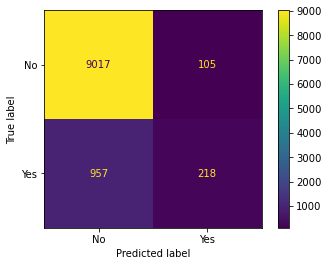

In [183]:
ConfusionMatrixDisplay.from_predictions(y_test2, lg_predict3, display_labels = ['No', 'Yes'])

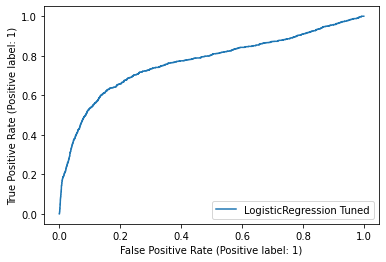

In [201]:
RocCurveDisplay.from_estimator(lreg_grid, xl_test2, y_test2, label = 'LogisticRegression Tuned')

In [166]:
knn_pipe = Pipeline([
    #('transform', transformer),
    ('knn', KNeighborsClassifier()) 
])

In [167]:
%%time
t0 = time()
params_knn = {'knn__n_neighbors' : range(1, 102, 2)}
knn_grid = GridSearchCV(estimator=knn_pipe, 
            param_grid=params_knn,
            scoring="recall_micro",
            cv=5
            ) 
knn_grid.fit(xl_train2, y_train2)
knn_time = time() - t0
print("done in %0.3fs" % (knn_time))
print("Best estimator found by grid search:")
print(knn_grid.best_estimator_)

done in 643.757s
Best estimator found by grid search:
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=55))])
CPU times: total: 30min 1s
Wall time: 10min 43s


In [168]:
knn_predict3 = knn_grid.predict(xl_test2)# check performance
knn_predict3_ta = knn_grid.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, knn_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, knn_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, knn_predict3))
print('F1 score:',f1_score(y_test2, knn_predict3))
print(classification_report(y_test2, knn_predict3, target_names=['No', 'Yes']))

ROCAUC score: 0.5897312086281937
Train Accuracy score: 0.9005535592891133
Test Accuracy score: 0.8951150820627367
F1 score: 0.296875
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      9122
         Yes       0.63      0.19      0.30      1175

    accuracy                           0.90     10297
   macro avg       0.77      0.59      0.62     10297
weighted avg       0.87      0.90      0.87     10297



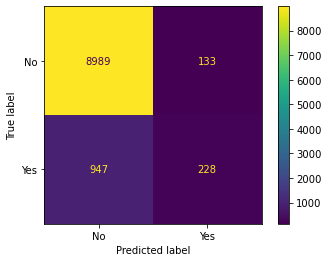

In [182]:
ConfusionMatrixDisplay.from_predictions(y_test2, knn_predict3, display_labels = ['No', 'Yes'])

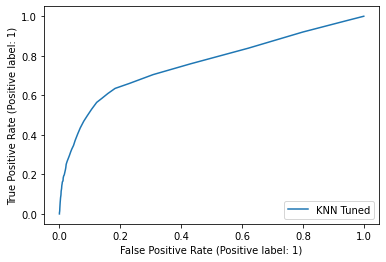

In [200]:
RocCurveDisplay.from_estimator(knn_grid, xl_test2, y_test2, label = 'KNN Tuned')

In [140]:
%%time
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(xl_train2, y_train2)
svc_time = time() - t0
print("done in %0.3fs" % (svc_time))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 68755.613s
Best estimator found by grid search:
SVC(C=24843.15674051285, class_weight='balanced', gamma=0.0025378412753199963)
CPU times: total: 19h 5min 22s
Wall time: 19h 5min 55s


In [141]:
svc_predict3 = clf.predict(xl_test2)# check performance
svc_predict3_ta = clf.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, svc_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, svc_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, svc_predict3))
print('F1 score:',f1_score(y_test2, svc_predict3))
print(classification_report(y_test2, svc_predict3, target_names=['No', 'Yes']))

ROCAUC score: 0.7351213106494937
Train Accuracy score: 0.813473179890583
Test Accuracy score: 0.8098475284063319
F1 score: 0.4337767495662233
              precision    recall  f1-score   support

          No       0.95      0.83      0.89      9122
         Yes       0.33      0.64      0.43      1175

    accuracy                           0.81     10297
   macro avg       0.64      0.74      0.66     10297
weighted avg       0.88      0.81      0.83     10297



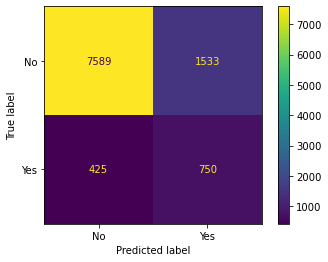

In [178]:
ConfusionMatrixDisplay.from_predictions(y_test2, svc_predict3, display_labels = ['No', 'Yes'])

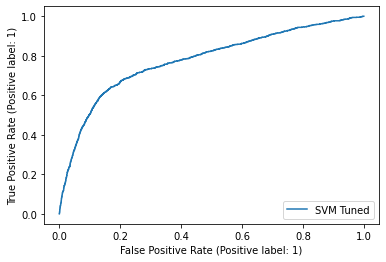

In [195]:
RocCurveDisplay.from_estimator(clf, xl_test2, y_test2, label = 'SVM Tuned')

In [142]:
%%time
t0 = time()
param_grid2 = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
clf2 = RandomizedSearchCV(
    RandomForestClassifier(), param_grid2, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf2 = clf2.fit(xl_train2, y_train2)
rfc_time = time() - t0
print("done in %0.3fs" % (rfc_time))
print("Best estimator found by grid search:")
print(clf2.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
done in 955.053s
Best estimator found by grid search:
RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=2000)
CPU times: total: 38.3 s
Wall time: 15min 55s


In [143]:
rfc_predict3 = clf2.predict(xl_test2)# check performance
rfc_predict3_ta = clf2.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, rfc_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, rfc_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, rfc_predict3))
print('F1 score:',f1_score(y_test2, rfc_predict3))
print(classification_report(y_test2, rfc_predict3, target_names=['No', 'Yes']))

ROCAUC score: 0.5953309044769018
Train Accuracy score: 0.9114628856301188
Test Accuracy score: 0.897154511022628
F1 score: 0.31189083820662766
              precision    recall  f1-score   support

          No       0.91      0.99      0.94      9122
         Yes       0.66      0.20      0.31      1175

    accuracy                           0.90     10297
   macro avg       0.78      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



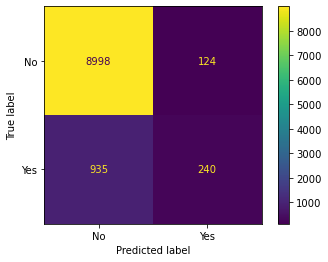

In [179]:
ConfusionMatrixDisplay.from_predictions(y_test2, rfc_predict3, display_labels = ['No', 'Yes'])

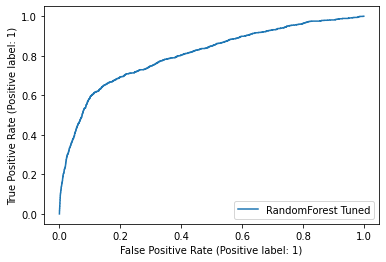

In [199]:
RocCurveDisplay.from_estimator(clf2, xl_test2, y_test2, pos_label = 1, label = 'RandomForest Tuned')

In [169]:
dtc_pipe = Pipeline([
    #('transform', transformer),
    ('dtc', DecisionTreeClassifier()) 
])

In [170]:
%%time
# Tune DecisionTree to boost recall. Model: DecisionTree Tune1
t0 = time()
param_dtc={"dtc__splitter":["best","random"],
            "dtc__max_depth" : [1,3,5,7,9,11,12],
           "dtc__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "dtc__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "dtc__max_features":["auto","log2","sqrt",None],
           "dtc__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dtc_grid = GridSearchCV(estimator=dtc_pipe, 
            param_grid=param_dtc,
            scoring="recall_micro",
            cv=5
            ) 
dtc_grid.fit(xl_train2, y_train2)
dtc_time = time() - t0
print("done in %0.3fs" % (dtc_time))
print("Best estimator found by grid search:")
print(dtc_grid.best_estimator_)

done in 2310.831s
Best estimator found by grid search:
Pipeline(steps=[('dtc',
                 DecisionTreeClassifier(max_depth=1, max_features='auto',
                                        min_weight_fraction_leaf=0.1))])
CPU times: total: 38min 27s
Wall time: 38min 30s


In [171]:
dtc_predict3 = dtc_grid.predict(xl_test2)# check performance
drc_predict3_ta = dtc_grid.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, dtc_predict3))
print('Train Accuracy score:', accuracy_score(y_train2, drc_predict3_ta))
print('Test Accuracy score:', accuracy_score(y_test2, dtc_predict3))
print('F1 score:',f1_score(y_test2, dtc_predict3))
print(classification_report(y_test2, dtc_predict3, target_names=['No', 'Yes']))

ROCAUC score: 0.5
Train Accuracy score: 0.8878314072059823
Test Accuracy score: 0.8858890939108478
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9122
         Yes       0.00      0.00      0.00      1175

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.78      0.89      0.83     10297



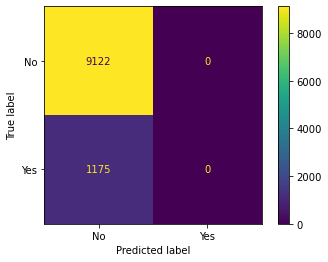

In [180]:
ConfusionMatrixDisplay.from_predictions(y_test2, dtc_predict3, display_labels = ['No', 'Yes'])

In [ ]:
# 100% False Negative This model also can't predict when someone will respond positively so again it is useless.

In [172]:
%%time
# attempt to tune again to do better. Model DecisionTree Tune2
t0 = time()
param2_dtc={"dtc__splitter":["best","random"],
            "dtc__max_depth" : [3,5,7,9,11,12,15],
           "dtc__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "dtc__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "dtc__max_features":["auto"],
           "dtc__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dtc_grid2 = GridSearchCV(estimator=dtc_pipe, 
            param_grid=param2_dtc,
            scoring="recall",
            cv=5
            ) 
dtc_grid2.fit(xl_train2, y_train2)
dtc_time2 = time() - t0
print("done in %0.3fs" % (dtc_time2))
print("Best estimator found by grid search:")
print(dtc_grid2.best_estimator_)

done in 286.091s
Best estimator found by grid search:
Pipeline(steps=[('dtc',
                 DecisionTreeClassifier(max_depth=3, max_features='auto',
                                        min_weight_fraction_leaf=0.1))])
CPU times: total: 4min 45s
Wall time: 4min 46s


In [173]:
dtc_predict4 = dtc_grid2.predict(xl_test2)# check performance
drc_predict4_ta = dtc_grid2.predict(xl_train2)# check performance
print('ROCAUC score:',roc_auc_score(y_test2, dtc_predict4))
print('Train Accuracy score:', accuracy_score(y_train2, drc_predict4_ta))
print('Test Accuracy score:', accuracy_score(y_test2, dtc_predict4))
print('F1 score:',f1_score(y_test2, dtc_predict4))
print(classification_report(y_test2, dtc_predict4, target_names=['No', 'Yes']))

ROCAUC score: 0.5
Train Accuracy score: 0.8878314072059823
Test Accuracy score: 0.8858890939108478
F1 score: 0.0
              precision    recall  f1-score   support

          No       0.89      1.00      0.94      9122
         Yes       0.00      0.00      0.00      1175

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.78      0.89      0.83     10297



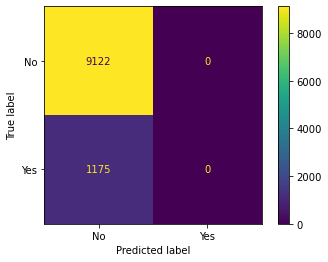

In [190]:
ConfusionMatrixDisplay.from_predictions(y_test2, dtc_predict4, display_labels = ['No', 'Yes'])

In [ ]:
# 100% False Negative This model also can't predict when someone will respond positively so again it is useless.

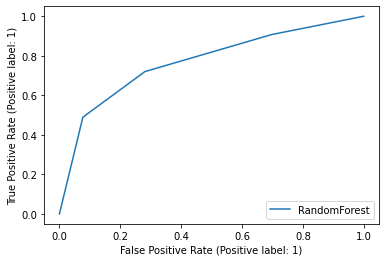

In [194]:
RocCurveDisplay.from_estimator(dtc_grid2, xl_test2, y_test2, label = 'DecisionTree Tune2')

Technical Findings:

In [222]:
# Put Results in a dataframe: Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models
data = {'Model': ['SVM2', 'LogisticRegression Tuned', 'KNN', 'SVM Tuned','RandomForest Tuned','DecisionTree Tune2'],
        'Yes precision': [0.15, 0.67, 0.63, 0.33, 0.66, 0.00],
        'Yes recall': [0.66, 0.19, 0.19, 0.64, 0.20, 0.00],
        'ROCAUC': [0.597, 0.587, 0.590, 0.735, 0.595, 0.5]
       }
results2_df = pd.DataFrame(data)#.set_index('Model')

In [223]:
results2_df.head(10)

,Model,Yes precision,Yes recall,ROCAUC
0,SVM2,0.15,0.66,0.597
1,LogisticRegression Tuned,0.67,0.19,0.587
2,KNN,0.63,0.19,0.590
3,SVM Tuned,0.33,0.64,0.735
4,RandomForest Tuned,0.66,0.20,0.595
5,DecisionTree Tune2,0.00,0.00,0.500


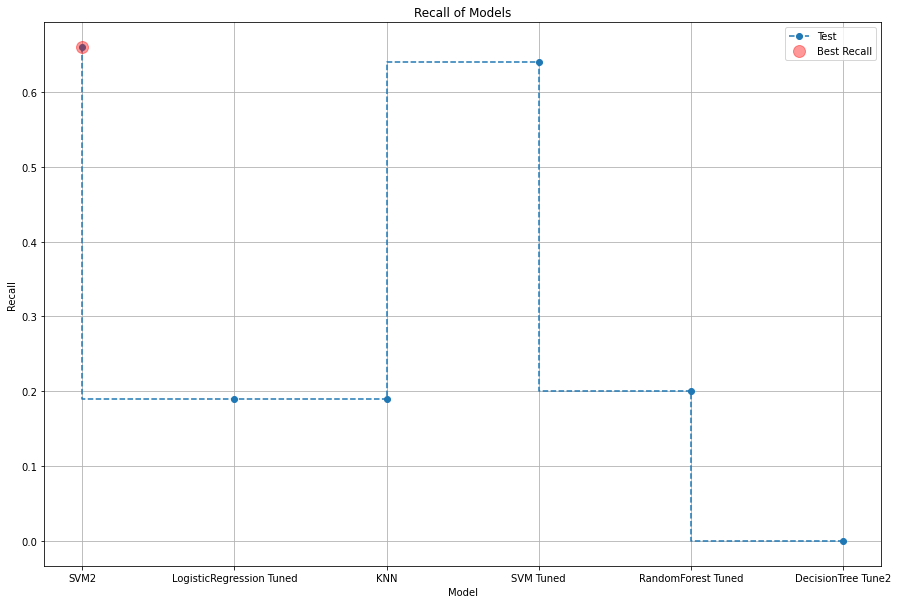

In [236]:
plt.figure(figsize = (15,10))
plt.step(results2_df['Model'], results2_df['Yes recall'], '--o', label = 'Test')
plt.plot(results2_df['Model'].iloc[np.argmax(results2_df['Yes recall'])], max(results2_df['Yes recall']), 'ro', markersize = 12, alpha = 0.4, label = 'Best Recall')
plt.legend()
plt.grid()
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall');

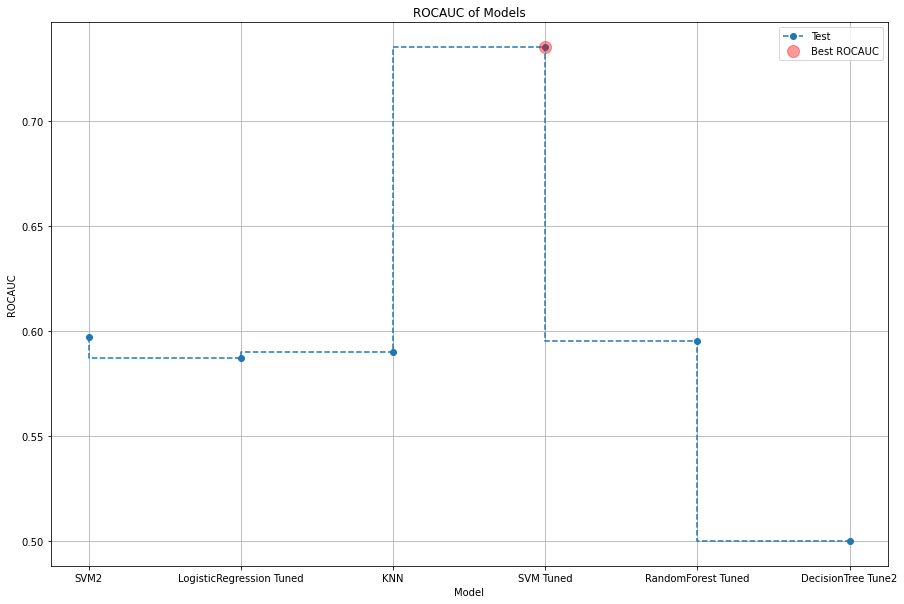

In [235]:
plt.figure(figsize = (15,10))
plt.step(results2_df['Model'], results2_df['ROCAUC'], '--o', label = 'Test')
plt.plot(results2_df['Model'].iloc[np.argmax(results2_df['ROCAUC'])], max(results2_df['ROCAUC']), 'ro', markersize = 12, alpha = 0.4, label = 'Best ROCAUC')
plt.legend()
plt.grid()
plt.title('ROCAUC of Models')
plt.xlabel('Model')
plt.ylabel('ROCAUC');

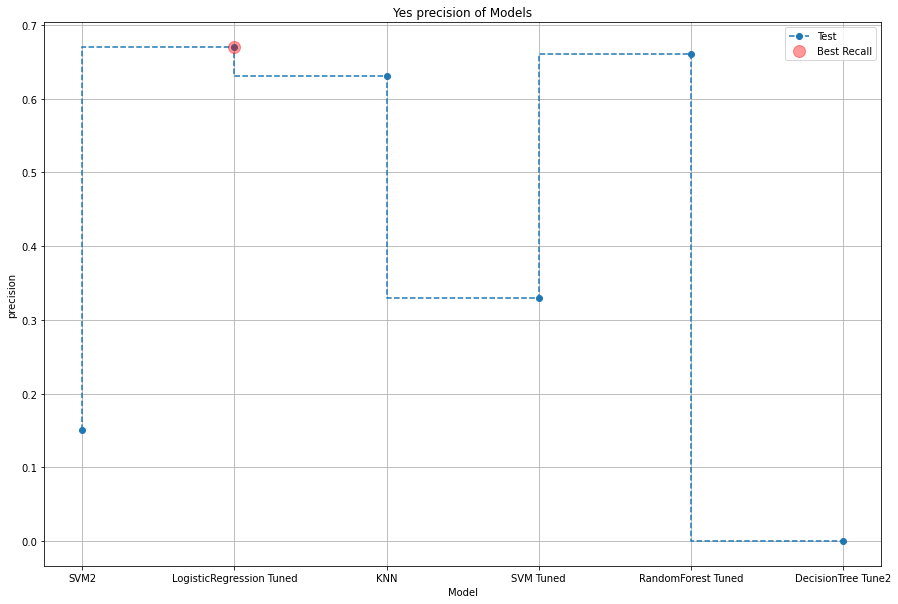

In [234]:
plt.figure(figsize = (15,10))
plt.step(results2_df['Model'], results2_df['Yes precision'], '--o', label = 'Test')
plt.plot(results2_df['Model'].iloc[np.argmax(results2_df['Yes precision'])], max(results2_df['Yes precision']), 'ro', markersize = 12, alpha = 0.4, label = 'Best Recall')
plt.legend()
plt.grid()
plt.title('Yes precision of Models')
plt.xlabel('Model')
plt.ylabel('precision');

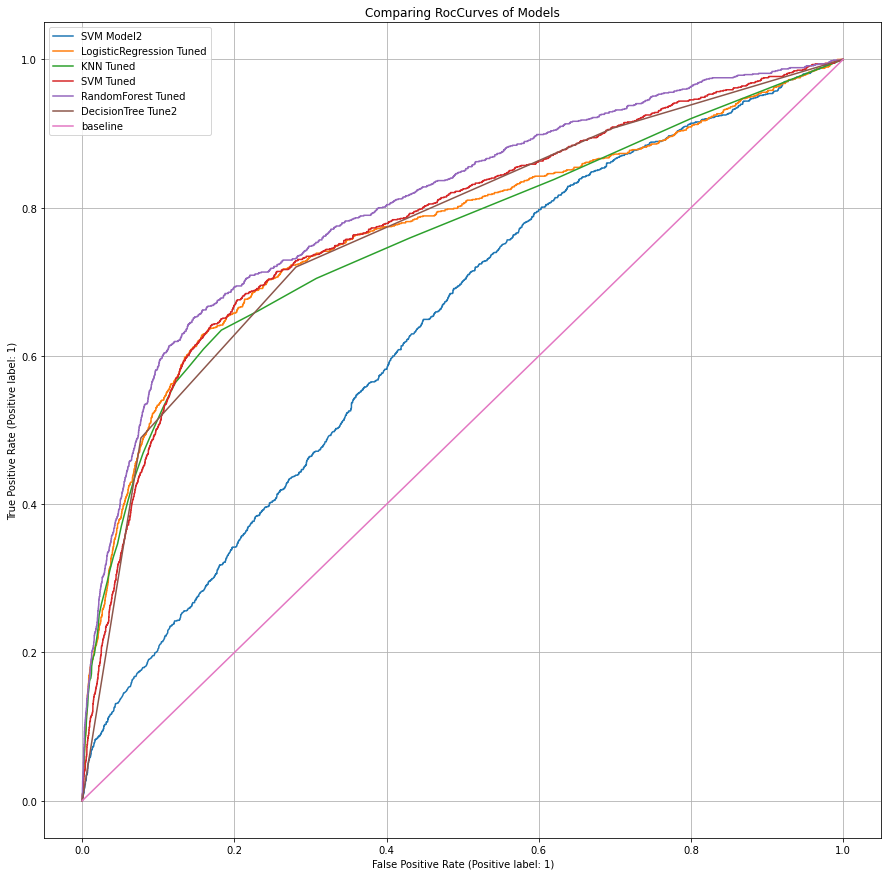

In [342]:
fig, ax = plt.subplots(figsize=(15, 15))
RocCurveDisplay.from_estimator(svc_model2, xl_test, y_test, ax = ax, label = 'SVM Model2')
RocCurveDisplay.from_estimator(lreg_grid, xl_test2, y_test2, ax = ax, label = 'LogisticRegression Tuned')
RocCurveDisplay.from_estimator(knn_grid, xl_test2, y_test2, ax = ax, label = 'KNN Tuned')
RocCurveDisplay.from_estimator(clf, xl_test2, y_test2, ax = ax, label = 'SVM Tuned')
RocCurveDisplay.from_estimator(clf2, xl_test2, y_test2, ax = ax, label = 'RandomForest Tuned')
RocCurveDisplay.from_estimator(dtc_grid2, xl_test2, y_test2, ax = ax, label = 'DecisionTree Tune2')

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Comparing RocCurves of Models')
plt.legend();

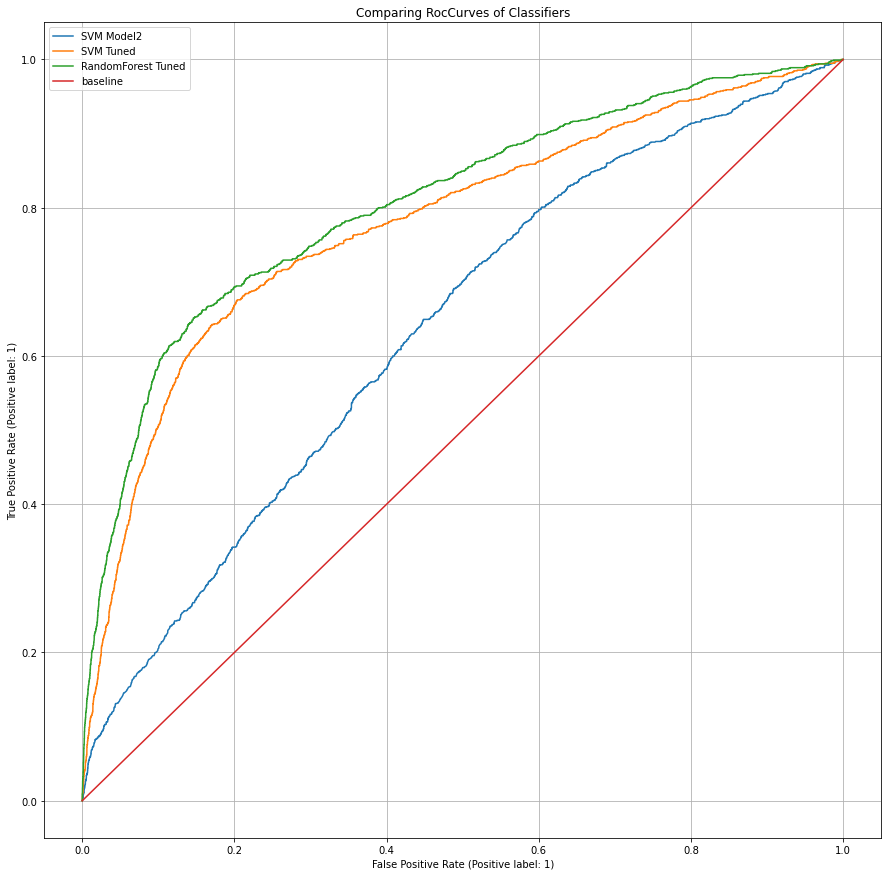

In [207]:
fig, ax = plt.subplots(figsize=(15, 15))
RocCurveDisplay.from_estimator(svc_model2, xl_test, y_test, ax = ax, label = 'SVM Model2')
RocCurveDisplay.from_estimator(clf, xl_test2, y_test2, ax = ax, label = 'SVM Tuned')
RocCurveDisplay.from_estimator(clf2, xl_test2, y_test2, ax = ax, label = 'RandomForest Tuned')

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Comparing RocCurves of Classifiers')
plt.legend();

The tuned SVM model is the best of the models with the second highest recall, the best ROCAUC, much lower false positives than the SVM Model2. 
Since the dataset is imbalanced, tuning data with oversampling or undersampling could be tried to improve performance of the models. 

In [330]:
%%time
result_test = permutation_importance(clf2, xl_test2, y_test2, n_repeats=30, random_state=0)
sorted_importances_idx2 = result_test.importances_mean.argsort()


CPU times: total: 22min 17s
Wall time: 22min 17s


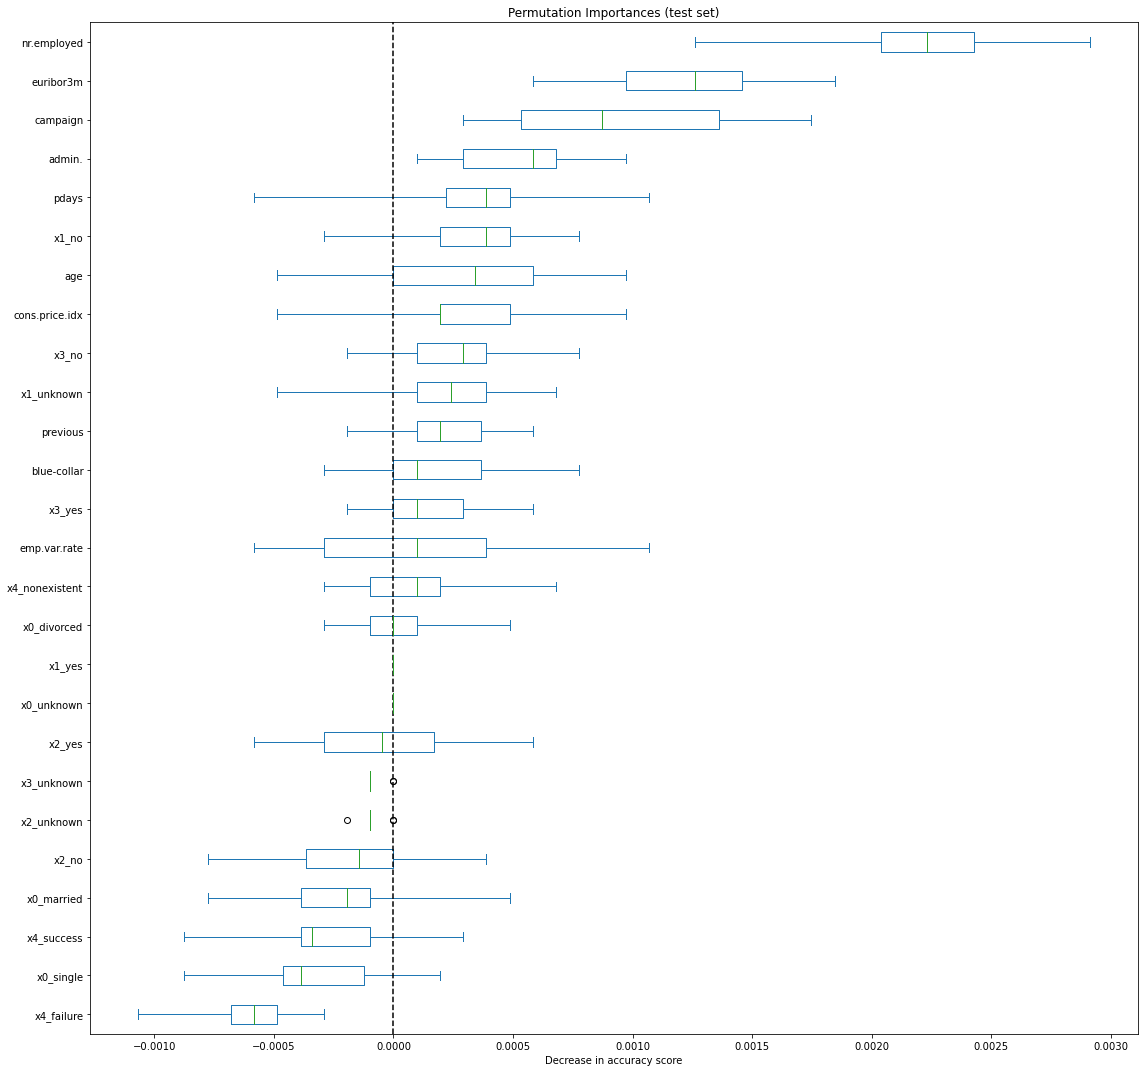

In [329]:
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx2].T,
    columns=xc[sorted_importances_idx2], #
)
ax = importances_test.plot.box(vert=False, whis=10, figsize=(16,15))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Nothing in the dataset is very important. This clearly shows the need to have better and different data about the clients.

Findings:
The best model (tuned SVM model) still leaves a lot of room for improvement, only predicting 64% of who will say yes. 
Therefore, it still isn’t very good at telling when a client is going to subscribe to a term deposit.

More and different details about the client/interaction appear to be required to better model who will say yes to subscribing. 

The current set of features doesn’t seem to describe well who would be willing to subscribe.

While it can be used to help find which clients to first call, it will inevitably miss opportunities.


Next steps and recommendations:

Go back to the drawing board and find more information about possible clients. 

Gather more data about the calls.  Then rerun this process.  

Find out how many potential clients don’t like being called. Survey them about getting an email or text rather than a call.

It would be good to find another way to market to these people, with just 11.3 percent of clients saying yes (to subscribing);
even if you could call everyone, likely some other method would be more cost effective, like an email, or in your banking app, or an ad for it. 

Try something different.


##### Questions